# Observations 

In [ ]:
# 1. The company tested the Capomulin and Ramican drug regimen on mice more than others. This may suggest that these two drugs are the most effective in reducing tumor volume size. 

# 2. Of the four prominent drug treatments, only Infubinol had a potential outlier. The company should investigate the cause of this outlier. 

# 3. There appears to be a strong positive correlation between mouse weight and average tumor volume. However, it is unknown whether the weight of mice determines the size of the tumor volume, and vice versa. From observing the effects of the Capomulin drug on the tumor volume of a particular mice, it seems that the size of the tumor volume have a positive effect on the weight of the mice i.e. tumor volume size - as a result of the drugs - determines weight in some mice.

## Observations and Insights 

In [314]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID").sort_values(by = ['Mouse ID', 'Timepoint'])

# Display the data table for preview
combined_df.head(200)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1015,b487,20,53.427663,0,Ceftamin,Female,6,28
1150,b487,25,56.057749,1,Ceftamin,Female,6,28
11,b559,0,45.000000,0,Naftisol,Male,20,26
284,b559,5,47.409897,0,Naftisol,Male,20,26


In [286]:
# Checking the number of mice.
mice_count = len(combined_df['Mouse ID'].unique())
mice_count

249

In [287]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [311]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_info = combined_df.loc[combined_df['Mouse ID'] == "g989"]
duplicate_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [289]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Print all rows where mouse ID is NOT in duplicates

cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicates)==False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [290]:
# Checking the number of mice in the clean DataFrame.
mice_count_final = len(cleaned_df['Mouse ID'].unique())
mice_count_final

## the answer should be 248

248

## Summary Statistics

In [291]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = cleaned_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = cleaned_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
std_dev = cleaned_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
var = cleaned_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
sem = cleaned_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Alternatively
# import numpy as np 
# mean = round(np.mean(no_duplicates_df['Tumor Volume (mm3)']),3)
# median = round(np.median(no_duplicates_df['Tumor Volume (mm3)']),3)
# var = round(np.var(no_duplicates_df['Tumor Volume (mm3)'], ddof = 0),3)
# std_dev = round(np.std(no_duplicates_df['Tumor Volume (mm3)'], ddof = 0),3)
# sem = round(st.sem(no_duplicates_df['Tumor Volume (mm3)'], ddof =0),3)

# Generate summary statistics table
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": std_dev, "SEM" : sem})

# Display
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# ... = df.groupby().agg({"Tumor Volume":["mean", "median"]})

f_summary_statistics = cleaned_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
f_summary_statistics

## Bar and Pie Charts

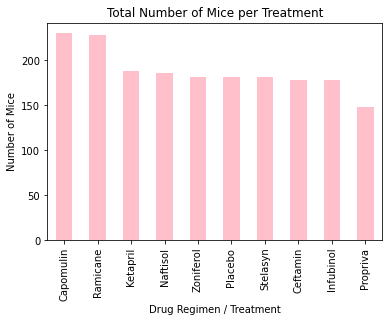

<Figure size 432x288 with 0 Axes>

In [293]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_total = cleaned_df['Drug Regimen'].value_counts()

mice_chart = mice_total.plot(kind = "bar", facecolor = "pink", title = "Total Number of Mice per Treatment", rot=90)
mice_chart.set_xlabel("Drug Regimen / Treatment")
mice_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

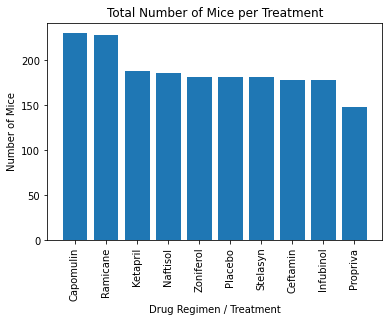

In [294]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_total.index.values, mice_total.values)
plt.xticks(rotation = 90)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen / Treatment")
plt.ylabel("Number of Mice")

plt.show() 

# x_axis = np.arange(len(mice_total))

# drug_regimen = cleaned_df['Drug Regimen'].unique()
# # drug_regimen

# # Create the ticks for our bar chart's x axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, drug_regimen, rotation = "vertical")

# plt.bar(x_axis, mice_total, color = "c")

# # Give the chart a title, x label, and y label
# plt.title("Total Number of Mice per Treatment")
# plt.xlabel("Drug Regimen / Treatment")
# plt.ylabel("Number of Mice")

# # Set the limits of the x axis
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(mice_total)+1)

# plt.show

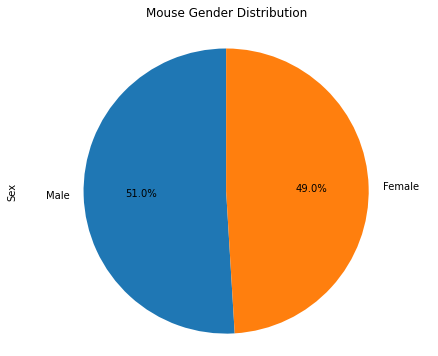

In [295]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = cleaned_df['Sex'].value_counts()
gender_dist

# Place the gender keys into a list
gender_list = gender_dist.keys()
gender_list

# Create a pie chart 
gender_mice = gender_dist.plot(kind = "pie", y = gender_list[0], title = "Mouse Gender Distribution", subplots = True, startangle = 90, autopct='%1.1f%%', figsize = (6,5))

plt.tight_layout()
plt.axis("equal")
plt.show()

(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

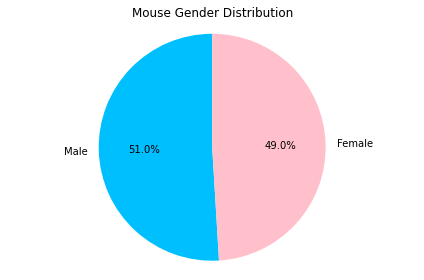

In [296]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The colors of each section of the pie chart
colors = ["deepskyblue", "pink"]

plt.pie(gender_dist, labels = gender_list, colors = colors, autopct="%1.1f%%", startangle = 90)
plt.title("Mouse Gender Distribution")
plt.tight_layout()
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [297]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = cleaned_df.groupby('Mouse ID').max()['Timepoint']
timepoint = timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge = timepoint.merge(cleaned_df, how = "left", on = ['Mouse ID', 'Timepoint'])
new_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [298]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    test = new_merge.loc[new_merge['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(test)
    
    # Determine outliers using upper and lower bounds
    quartiles = test.quantile([.25,.5,.75])
    Q1 = quartiles[.25]
    Q3 = quartiles[.75]

    IQR = Q3 - Q1

    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5

    outliers = test.loc[(test < lower_bound) | (test > upper_bound)]
    
    print(f"For {name} the potential outliers are {outliers}.")

For Capomulin the potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64).
For Ramicane the potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64).
For Infubinol the potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
For Ceftamin the potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64).


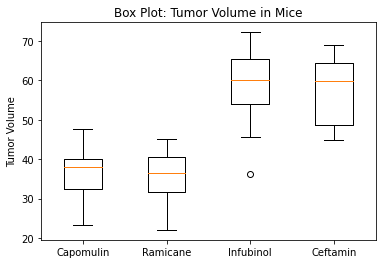

In [299]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels=treatments)
plt.ylabel("Tumor Volume")
plt.title("Box Plot: Tumor Volume in Mice")
plt.show()

## Line and Scatter Plots

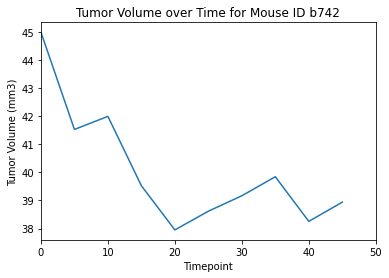

In [300]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
# timepoint_capumolin

mouse_test = capomulin_data.loc[capomulin_data['Mouse ID'] == "b742"]
#mouse_test.head()
plt.plot(mouse_test['Timepoint'], mouse_test['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Mouse ID b742")
plt.xlim(0,50)
plt.show()

In [301]:
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


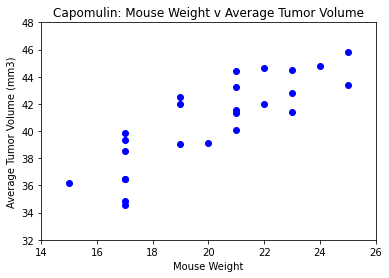

In [302]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_data.groupby('Mouse ID').mean()
capomulin_average

mice_weight = capomulin_average['Weight (g)']
avg_tumor = capomulin_average['Tumor Volume (mm3)']

plt.scatter(mice_weight, avg_tumor, facecolors = 'blue')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(14,26)
plt.ylim(32,48)
plt.title('Capomulin: Mouse Weight v Average Tumor Volume')

plt.show()

## Correlation and Regression

The correlation coefficient between Mouse Weight and Average Tumor Volume for the Capomulin regimen is 0.842.



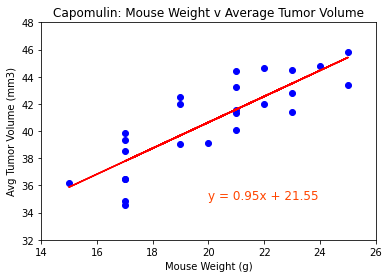

In [303]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# x-value == mice_weight = capomulin_average['Weight (g)']
# y-value == avg_tumor = capomulin_average['Tumor Volume (mm3)']

# Correlation coefficient for mouse weight and average tumor volume 
r_xy = st.pearsonr(mice_weight, avg_tumor)
# r_xy
print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume for the Capomulin regimen is {round(r_xy[0],3)}.")
print()

# Linear regression model 
(m_slope, b_intercept, r_xy, p_value, std_error) = st.linregress(mice_weight, avg_tumor)

# Equation 
m_fit = m_slope * mice_weight + b_intercept
line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(b_intercept,2))

# avg_tumor = slope * mice_weight + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot depicting mouse weight versus average tumor volume including linear regression model  
plt.scatter(mice_weight, avg_tumor, facecolors = "blue")
plt.plot(mice_weight,m_fit, "r-")
plt.annotate(line_eq, (20,35), fontsize = 12, color = "orangered")
plt.title("Capomulin: Mouse Weight v Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(32,48)
plt.show()
